In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1

In [2]:
#1
def first(x0=1., eps=1e-6, maxiter=100):
    niter = 0
    x = x0
    for i in range(maxiter):
        niter += 1
        x1 = x
        x = x1 + (np.cos(x1) + 1) / np.sin(x1)
        if abs(x - x1) < eps:
            break
    return x, niter

In [3]:
f1 = lambda x: 1 + np.cos(x)
x1, niter1 = first()
f1(x1)

1.723066134218243e-13

/home/azat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


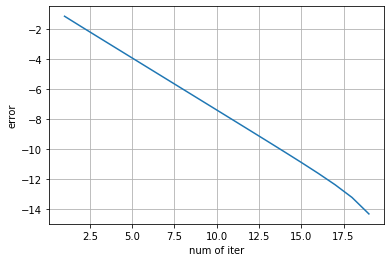

In [4]:

niter1
n = np.arange(1, niter1 + 1)
err = []
for i in n:
    xx, niter = first(maxiter=i)
    err.append(np.log(abs(x1 - xx)))
plt.plot(n, err)
plt.grid(True)
plt.xlabel("num of iter")
plt.ylabel("error")
plt.show()

In [5]:
def second(x0=1., eps=1e-5, maxiter=100):
    niter = 0
    x = x0
    for i in range(maxiter):
        niter += 1
        x1 = x
        x = 1/2 * (x1 + 2/x1)
        if abs(x - x1) < eps:
            break
    return x, niter

In [6]:
f2 = lambda x: x*x - 2
x2, niter2 = second()
f2(x2)

4.510614104447086e-12

/home/azat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


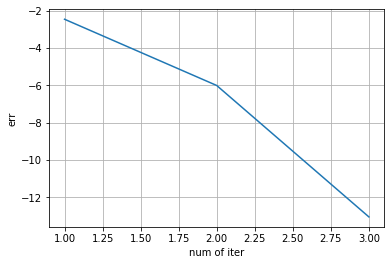

In [7]:
n2 = np.arange(1, niter2 + 1)
err2 = []
for i in n2:
    xx, niter = second(maxiter = i)
    err2.append(np.log(abs(xx - x2)))
plt.plot(n2, err2)
plt.grid(True)
plt.xlabel("num of iter")
plt.ylabel("err")
plt.show()

# Задание 2

In [8]:
#2
rnd = np.random.RandomState(1234)
n = 10
A = rnd.uniform(size=(n, n)) + np.diag([15]*n)
b = rnd.uniform(size=n)

In [9]:
diag = A.diagonal()
D = np.diag(diag)
D_inv = np.diag(1/diag)
B = D_inv @ (D - A)

In [10]:
B_norm = np.linalg.norm(B, ord=2)
B_norm

0.31853784252598116

In [11]:
def jacobi_iter(A, b, x0, eps=1e-5, maxiter=500):
    x = x0.copy()
    nit = 0
    diag = A.diagonal()
    D = np.diag(diag)
    D_inv = np.diag(1/diag)
    B = D_inv @ (D - A)
    for i in range(maxiter):
        nit += 1
        x1 = x.copy()
        x = B @ x1 + D_inv @ b
        if np.linalg.norm(x - x1) < eps:
            break
    return x, nit

In [12]:
x0 = np.ones(n)
xx, niter = jacobi_iter(A, b, x0, eps=1e-10)
xx

array([ 0.03919429,  0.03780037,  0.04283232,  0.02365951,  0.05745031,
       -0.00030244, -0.00577279,  0.03177549, -0.00422849,  0.05284648])

In [13]:
abs(A @ xx - b)

array([7.62331309e-11, 6.65593136e-11, 6.30350216e-11, 7.85705945e-11,
       4.14165369e-11, 6.66706690e-11, 4.21568787e-11, 5.15576470e-11,
       6.96806224e-11, 6.05883121e-11])

In [14]:
for i in range(1, 15):
    print("Diag val: ", 15 - i)
    N = A - np.diag([i]*n)
    
    diag = N.diagonal()
    D = np.diag(diag)
    D_inv = np.diag(1/diag)
    B = D_inv @ (D - N)
    print("2-norm of B", np.linalg.norm(B, ord=2))
    print("inf norm of B", np.linalg.norm(B, ord=np.inf))
    xx, niter = jacobi_iter(N, b, x0)
    print("Num of iter: ", niter)
    x_actual = np.linalg.solve(N, b)
    
    if np.linalg.norm(x_actual - xx) < 1e-5:
        print("Converges")
    else:
        print("Diverges")
    print("")

Diag val:  14
2-norm of B 0.3406178896769193
inf norm of B 0.4250216549874149
Num of iter:  13
Converges

Diag val:  13
2-norm of B 0.36598918272357145
inf norm of B 0.45735802101261736
Num of iter:  14
Converges

Diag val:  12
2-norm of B 0.39544749436992493
inf norm of B 0.4950199777696716
Num of iter:  15
Converges

Diag val:  11
2-norm of B 0.4300678819915193
inf norm of B 0.5394412211037213
Num of iter:  16
Converges

Diag val:  10
2-norm of B 0.4713391399140566
inf norm of B 0.5926207973337314
Num of iter:  18
Converges

Diag val:  9
2-norm of B 0.5213843126934741
inf norm of B 0.657432248534008
Num of iter:  20
Converges

Diag val:  8
2-norm of B 0.5833393274617781
inf norm of B 0.7381605236308574
Num of iter:  23
Converges

Diag val:  7
2-norm of B 0.6620402825738391
inf norm of B 0.8414898373897813
Num of iter:  29
Converges

Diag val:  6
2-norm of B 0.7653600109101562
inf norm of B 0.9784562720585108
Num of iter:  41
Converges

Diag val:  5
2-norm of B 0.9070463899591017
inf 

# Задание 4

In [15]:
#4
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    niter = 0
    x = x0
    for i in range(maxiter):
        niter += 1
        x1 = x
        x = x1 - f(x1)/ fder(x1)
        if abs(x - x1) <= eps:
            break
    return x, niter

In [16]:
f = lambda x: x**3 - 1
fder = lambda x: 3 * x**2
xx, niter = newton_iteration(f, fder, 1j)
xx

(-0.5+0.8660254037844387j)

In [17]:
# 3 корня
r1 = 1.
r2 = np.exp(2j*np.pi/3)
r3 = np.exp(4j*np.pi/3)    

In [18]:
def classify(x):
    r = [1., np.exp(2j*np.pi/3), np.exp(4j*np.pi/3)]
    for i in range(3):
        if abs(x - r[i]) < 1e-5:
            return i+1

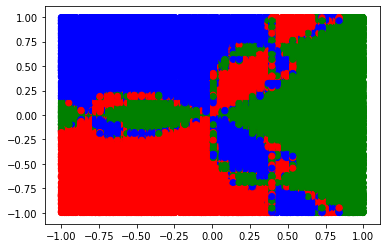

In [19]:
x = np.random.uniform(-1, 1, 250)
y = np.random.uniform(-1, 1, 250)
h = []
points = []
for i in range(len(x)):
    for j in range(len(y)):
        h.append(classify(newton_iteration(f, fder, complex(x[i], y[j]))[0]))
        points.append([x[i], y[j]])
c = []
for i in h:
    if i == 1:
        c.append('g') #корень 1
    elif i == 2:
        c.append('b') #корень exp(2i*pi/3)
    else:
        c.append('r') #корень exp(4i*pi/3)
p = np.array(points)
plt.scatter(p[:, 0], p[:, 1], c=c)
plt.show()

# Задание 3

In [20]:
#3
nf = lambda x: 1 + np.exp(-3 * (x - 5)**2) #функция n
n = 1000 # количество точек в сетке
dx = 10. / n
X = np.linspace(start=0, stop=10, num=n, dtype=float)
phi = np.zeros(n)

In [21]:
def G(X, phi, dx):
    '''
    Вектор-функция G,
    где Gj = (phi_j+1 - 2*phi_j + phi_j-1) / dx^2 - exp(phi_j) + n(x_j)
    -------------------------------------------------------
    Input:
    X: ndarray
    Вектор значений х по сетке, где X[0] = 0, X[N] = 10
    
    phi: ndarray
    Вектор из приближений вектора phi, где phi[i] = phi(X[i])
    phi[0] = phi[N] = 0
    
    dx: float
    Разница между соседними точками (X[i + 1] - X[i]) 
    '''
    n = phi.shape[0] - 2
    g = np.zeros(n)
    for i in range(1, n + 1):
        g[i - 1] = np.exp(phi[i]) - nf(X[i]) + (-phi[i+1] - phi[i-1] + 2*phi[i])/dx**2
    return g

def jacobi(phi, dx):
    n = phi.shape[0] - 2
    J = np.zeros((n, n))
    for i in range(1, n - 1):
        J[i, i - 1] = 1/dx**2
        J[i, i] = -2/dx**2 - np.exp(phi[i + 1])
        J[i, i + 1] = 1/dx**2
    J[0][0] = -2/dx**2 - np.exp(phi[1])
    J[0][1] = 1/dx**2
    
    J[n-1][n-2] = 1/dx**2
    J[n-1][n - 1] = -2/dx**2 - np.exp(phi[n])
    return J

In [22]:
def newton(phi, eps=1e-5, maxiter=50):
    n = phi.shape[0]
    e = np.zeros(n-2)
    niter = 0
    for i in range(maxiter):
        niter += 1
        J = jacobi(phi, dx)
        e = np.linalg.solve(J, G(X, phi, dx))
        phi[1:n-1] = phi[1:n-1] + e
        if np.linalg.norm(e) < eps:
            break
    return phi, niter

In [23]:
phi = np.zeros(n)
new_phi, it = newton(phi, eps=1e-10)
it

5

In [24]:
new_phi

array([0.00000000e+00, 6.54348061e-05, 1.30876156e-04, 1.96330594e-04,
       2.61804667e-04, 3.27304925e-04, 3.92837918e-04, 4.58410202e-04,
       5.24028338e-04, 5.89698891e-04, 6.55428431e-04, 7.21223535e-04,
       7.87090787e-04, 8.53036780e-04, 9.19068113e-04, 9.85191395e-04,
       1.05141324e-03, 1.11774029e-03, 1.18417917e-03, 1.25073654e-03,
       1.31741907e-03, 1.38423342e-03, 1.45118629e-03, 1.51828438e-03,
       1.58553442e-03, 1.65294314e-03, 1.72051729e-03, 1.78826363e-03,
       1.85618897e-03, 1.92430009e-03, 1.99260384e-03, 2.06110704e-03,
       2.12981656e-03, 2.19873929e-03, 2.26788214e-03, 2.33725203e-03,
       2.40685593e-03, 2.47670079e-03, 2.54679364e-03, 2.61714149e-03,
       2.68775139e-03, 2.75863043e-03, 2.82978572e-03, 2.90122438e-03,
       2.97295359e-03, 3.04498054e-03, 3.11731245e-03, 3.18995658e-03,
       3.26292021e-03, 3.33621066e-03, 3.40983530e-03, 3.48380150e-03,
       3.55811669e-03, 3.63278832e-03, 3.70782389e-03, 3.78323094e-03,
      

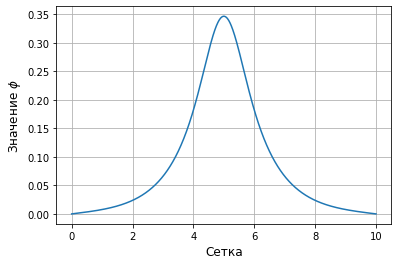

In [25]:
plt.plot(X, new_phi)
plt.grid(True)
plt.xlabel("Cетка", fontsize=12)
plt.ylabel("Значение $\phi$", fontsize=12)
plt.show()